In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

In [46]:
def find_optimal_components(X_train, max_components=None):
    if max_components is None:
        max_components = min(X_train.shape)

    pca = PCA().fit(X_train)  # Fit PCA on training data
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.show()

    # Find the optimal number of components based on the graph
    optimal_components = np.argmax(explained_variance >= 0.95) + 1  # Adjust threshold as needed
    optimal_components = 2 if optimal_components == 1 else optimal_components
    return optimal_components

In [2]:
dataset = pd.read_csv(r"Datasets/Breast Cancer.csv")

In [8]:
dataset["diagnosis"].value_counts()
dataset["diagnosis"].value_counts()["B"] / len(dataset)

0.6274165202108963

In [48]:
features = dataset.copy(deep=True)
features = features.drop(["diagnosis", "id"], axis=1)

labels = dataset[["diagnosis"]].copy(deep=True)

In [49]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(features, labels)

In [54]:
# Get the indices of the top k features
top_feature_indices = fit.get_support(indices=True)
# Get the names of the top k features
top_feature_names = features.columns[top_feature_indices].tolist()

print("Top 5 feature names:")
print(top_feature_names)
print(type(top_feature_names))

Top 5 feature names:
['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst', 'area_worst']
<class 'list'>


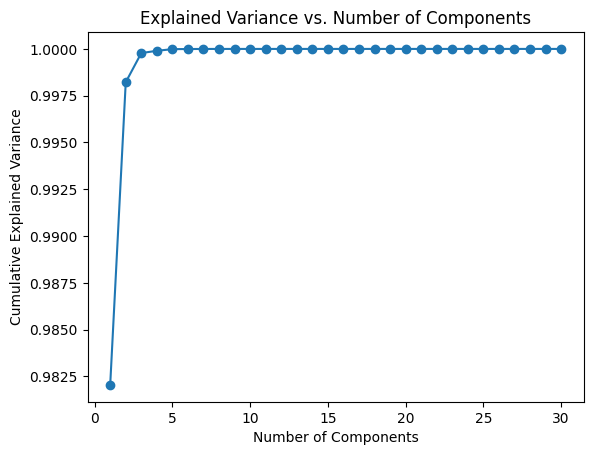

Optimal number of components: 2


In [51]:
# Assuming X_train is your training data
optimal_n_components = find_optimal_components(features)
print(f"Optimal number of components: {optimal_n_components}")

In [52]:
labels

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
from qiskit_aer import Aer